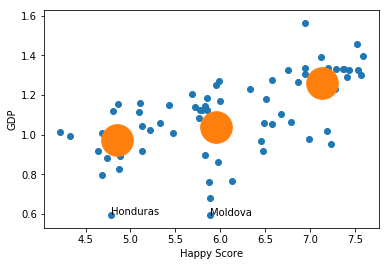

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

data = pd.read_csv('happyscore_income.csv')
data.sort_values('avg_income', inplace=True)  
#sorting data based on avg_income, showed that the country with the lowest avg income had the lowest gdp, regardless
#of their happiness
filtered = data[data['avg_income'] > 3000]
#simply to get the data for medium to high income countries only, as the lower income countries had a gdp of even less than 0.1


happy_score = filtered['happyScore']
gdp = filtered['GDP']


gdp_and_happy_score = np.column_stack((happy_score, gdp))
km_result = KMeans(n_clusters=3).fit(gdp_and_happy_score)
clusters = km_result.cluster_centers_


plt.xlabel('Happy Score')
plt.ylabel('GDP')

plt.scatter(happy_score, gdp)
plt.scatter(clusters[:,0], clusters[:,1], s=1000)

#these two countries have the lowest avg_income, i labelled em cuz they seem to be the most far away from the closest cluster
#maybe around 2 standard deviations away as well
plt.text(filtered.iloc[0]['happyScore'], filtered.iloc[0]['GDP'], filtered.iloc[0]['country'])
plt.text(filtered.iloc[1]['happyScore'], filtered.iloc[1]['GDP'], filtered.iloc[1]['country'])

plt.show()